# Submetric 3: **Cost**

## Relevance of cost

It is trivial that cost of living has a huge impact on the quality of life in any neighborhood. This is why we decided that cost of housing would be crucial in finding the best neighborhood in Pittsburgh.

---

In [2]:
import pandas as pd
import numpy as np

## Pittsburgh Cost of Rent Per Unit Data Set

Includes data from a **2015** census

We will be analyzing the average asking price for rent for each neighborhood to determine which is the most affordable.

As you can see, this DataFrame gives us the number of units in each neighborhood in several ranges of rent cost. Therefore, in order to find the mean price per neighborhood, we must account for these ranges in price.

In [3]:
data = pd.read_csv("contract-rent.csv")
data.head(10)

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; With cash rent:,Margin of Error; With cash rent:,Estimate; With cash rent: - Less than $100,Margin of Error; With cash rent: - Less than $100,Estimate; With cash rent: - $100 to $149,Margin of Error; With cash rent: - $100 to $149,...,"Estimate; With cash rent: - $1,000 to $1,249","Margin of Error; With cash rent: - $1,000 to $1,249","Estimate; With cash rent: - $1,250 to $1,499","Margin of Error; With cash rent: - $1,250 to $1,499","Estimate; With cash rent: - $1,500 to $1,999","Margin of Error; With cash rent: - $1,500 to $1,999","Estimate; With cash rent: - $2,000 or more","Margin of Error; With cash rent: - $2,000 or more",Estimate; No cash rent,Margin of Error; No cash rent
0,Allegheny Center,1,695.0,103.000000,688.0,103.000000,61.0,57.000000,6.0,10.000000,...,103.0,50.000000,10.0,15.000000,14.0,15.000000,0.0,10.000000,7.0,10.000000
1,Allegheny West,2,73.0,33.000000,73.0,33.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,5.0,8.000000,0.0,10.000000,0.0,10.000000
2,Allentown,3,563.0,154.664152,512.0,136.194714,0.0,17.320508,0.0,17.320508,...,36.0,42.426407,0.0,17.320508,0.0,17.320508,0.0,17.320508,51.0,77.304592
3,Arlington,4,216.0,70.469852,211.0,70.469852,0.0,17.320508,0.0,17.320508,...,0.0,17.320508,6.0,16.763055,0.0,17.320508,0.0,17.320508,5.0,15.779734
4,Arlington Heights,5,170.0,69.000000,166.0,70.000000,0.0,10.000000,19.0,31.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,4.0,6.000000
5,Banksville,6,1022.0,221.104048,1015.0,221.104048,0.0,20.000000,0.0,20.000000,...,45.0,43.416587,0.0,20.000000,0.0,20.000000,0.0,20.000000,7.0,22.271057
6,Bedford Dwellings,7,633.0,69.000000,630.0,68.000000,219.0,72.000000,48.0,28.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,3.0,8.000000
7,Beechview,8,1514.0,236.300656,1467.0,234.793526,0.0,31.622777,0.0,31.622777,...,13.0,36.619667,0.0,31.622777,0.0,31.622777,0.0,31.622777,47.0,41.218928
8,Beltzhoover,9,326.0,113.556154,298.0,110.607414,0.0,20.000000,10.0,22.912878,...,0.0,20.000000,39.0,62.449980,0.0,20.000000,0.0,20.000000,28.0,36.124784
9,Bloomfield,10,2990.0,221.682205,2935.0,220.914010,0.0,31.622777,7.0,31.622777,...,225.0,83.000000,100.0,63.906181,122.0,61.733297,13.0,37.202150,55.0,38.884444


In the code block below, we take the mean price within each range (the pricePoints list) and multiply it by the number of associated units in each neighborhood. We then have the total price paid by tenants in every neighborhood.

In [4]:
pricePoints = [50, 125, 175, 225, 275, 325, 375, 425, 475, 525, 575, 625, 675, 725, 775, 850, 950, 1125, 1375, 1750, 2250, 2750, 3250, 3500]

count = 0
weighted_total = [0] * 91
col = data.columns[6:50]

for i in col:
    total_prices = []
    if (i.startswith("Estimate")):
        for j in data[i]:
            j = int(j)
            total_prices.append(j*pricePoints[count])
        count += 1

    for k in range(len(total_prices)):
        weighted_total[k] += total_prices[k]
df = pd.DataFrame(weighted_total)
df

,0
0,491375
1,50125
2,411600
3,153400
4,56850
...,...
86,383250
87,40625
88,326525
89,370925


We must then average out the prices by dividing by the total number of units in each neighborhood, because there is a different number of units in each neighborhood.

In [22]:
weighted_avg = [0] * 91

for i in range(len(weighted_total)):
    weighted_avg[i] = weighted_total[i]/(data["Estimate; With cash rent:"][i])
df = pd.DataFrame(weighted_avg)
df
df

/var/folders/49/t0n2_fjn7_bgcd57dxjrtp8c0000gn/T/ipykernel_31813/3939173526.py:4: RuntimeWarning: invalid value encountered in double_scalars
  weighted_avg[i] = weighted_total[i]/(data["Estimate; With cash rent:"][i])


,0
0,714.207849
1,686.643836
2,803.906250
3,727.014218
4,342.469880
...,...
86,678.318584
87,501.543210
88,798.349633
89,738.894422


Now we are able to create a bar plot of the 20 cheapest neighborhoods in Pittsburgh

<AxesSubplot:xlabel='Neighborhood'>

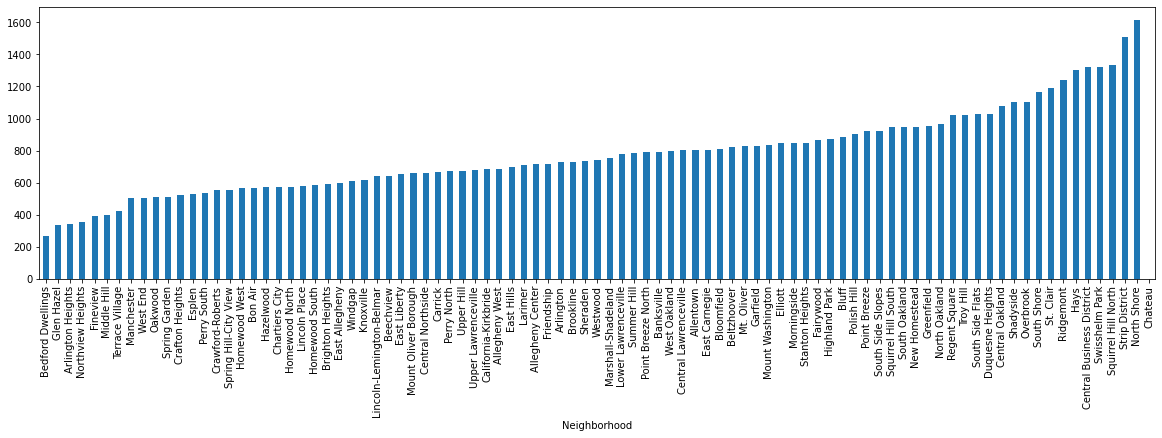

In [25]:
sr = pd.Series(weighted_avg, index = data["Neighborhood"])
sr = sr.sort_values(ascending=True)
sr[:].plot.bar(figsize=(20,5))

> **NOTE:**  It should be noted that the units around the center of the data set have roughly the same average price

## Conclusion

In order to find the lowest cost neighborhood by rent we:<br />
* Generated a list of total tenant payments in each neighborhood
* Divided each neighborhoods total cost of living by the total number of units
* Summerized the data in a bar chart to make it parsable and comprehensible

Now that we've looked at the cheapest neighborhoods in Pittsburgh based on rent, we can combine our findings from the other submetrics to conclude the **best** neighborhood to live in.
